# Modelo red neuronal mas simple

In [61]:
from importacion_preprocesado import download_and_load_data, preprocesamiento


tamany_img = (128,128) # tamaño reducido para colab porque si no supera la ram
X, y = download_and_load_data(target_size=tamany_img)

X_train, X_val, X_test, y_train, y_val, y_test = preprocesamiento(X, y)

Dataset ya existe, solo se van a cargar las imágenes.
X shape: (4217, 128, 128, 3) y shape: (4217,)


In [70]:
# Importar la función
from models.simple_cnn import create_model

# Crear el modelo
model = create_model(input_shape=(128,128,3), num_classes=4)

c:\Users\roger\miniconda3\envs\dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)

hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.5832 - loss: 2.0292 - val_accuracy: 0.6659 - val_loss: 0.7234
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7386 - loss: 0.6137 - val_accuracy: 0.7630 - val_loss: 0.5674
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7881 - loss: 0.5168 - val_accuracy: 0.7701 - val_loss: 0.5453
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8094 - loss: 0.4903 - val_accuracy: 0.6671 - val_loss: 1.0947
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8343 - loss: 0.4362 - val_accuracy: 0.7784 - val_loss: 0.5866
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8399 - loss: 0.4149 - val_accuracy: 0.7713 - val_loss: 0.5775
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8454 - loss: 0.4047 - val_accuracy: 0.8069 - val_loss: 0.5090
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8664 - loss: 0.3475 - val_accuracy: 0.8021 - 

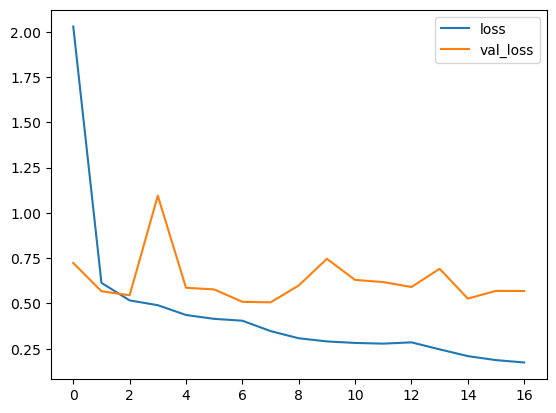

In [72]:
import matplotlib.pyplot as plt
# Visualize loss evolution during training
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │     1,016,068 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,049,550 (11.63 MB)

 Trainable params: 1,016,516 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,033,034 (7.76 MB)

In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

datasets = {
    "Train": (X_train, y_train),
    "Val": (X_val, y_val),
    "Test": (X_test, y_test)
}

def evaluate(model, X, y):
    #Convertir a enteros
    y_true = np.argmax(y, axis=1)

    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    return acc, f1


def crear_df_metricas(model, datasets):
    results = {}
    for split_name, (X, y) in datasets.items():
        acc, f1 = evaluate(model, X, y)
        results[split_name] = [acc, f1]
    
    df = pd.DataFrame(results, index=["Accuracy", "F1"])
    return df

df = crear_df_metricas(model, datasets)
df.round(2)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Train,Val,Test
Accuracy,0.96,0.79,0.8
F1,0.96,0.79,0.8


In [75]:
def plot_barra(metrica, titulo, color):

    plt.figure(figsize=(6,4))
    bars = plt.bar(metrica.index, metrica.values, color=color)
    plt.bar_label(bars)
    plt.title(f"{titulo}: Train vs Validation vs Test")
    plt.ylabel(titulo)
    plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--')
    plt.show()


def plots_metricas(df):
    #Extraemos la fila
    accuracy = df.loc["Accuracy"]
    f1 = df.loc["F1"]

    #Grafico de Accuracy
    plot_barra(accuracy, titulo = "Accuracy", color="blue")

    #Grafico de 
    plot_barra(f1, titulo ="F1", color = "red")

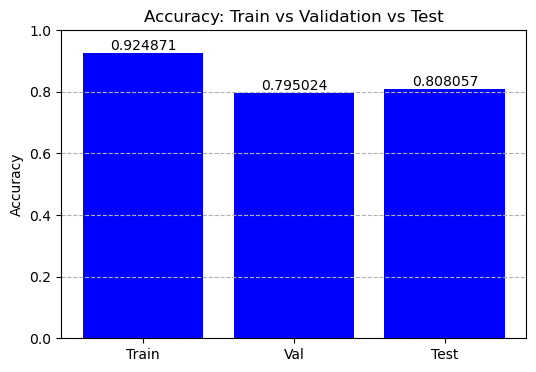

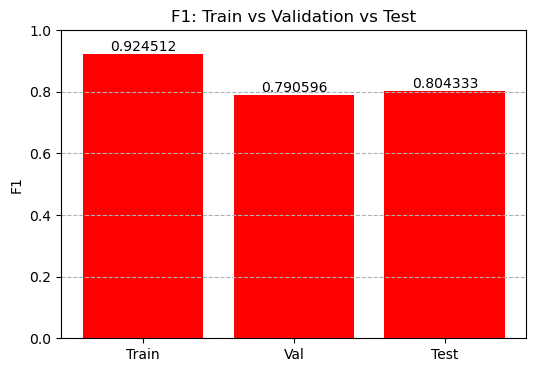

In [ ]:
plots_metricas(df)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


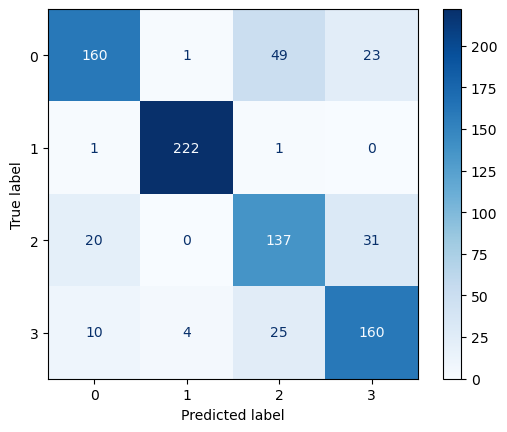

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")